In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-21 04:32:54.261686: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 04:32:54.265006: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 04:32:54.302506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 04:32:55.606634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6:50 2s/step - loss: 0.1992

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1374

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1146

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1070

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1006

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0923

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0859

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0822

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0773

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0730

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0693

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0670

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0639

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0610

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0593

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0569

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0554

 46/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0534

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0521

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0503

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0486

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0471

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0461

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0452

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0439

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0398

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0388

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0379

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0370

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0364

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0359

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0354

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0349

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0342

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0337

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0332

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0328

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0324

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0320

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0316

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0312

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0308

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0304

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0301

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0297

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0292

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0289

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0286

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0283

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0280

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0277

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0273

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0270

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0266

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0263

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0259

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0256

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0253

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0250

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0246

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0241

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0239

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0236

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0234

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0232

170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0229 - val_loss: 0.0013


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0012

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0010

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 9.3258e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 8.8006e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 8.1897e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.9080e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.8107e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.7254e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.6292e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.5180e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.4848e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.4111e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.3528e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.2855e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.2007e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.1487e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.0801e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.0414e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.9991e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.9707e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.9419e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.9039e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.8678e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.8295e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7920e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7535e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7369e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7271e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7180e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7060e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7000e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6928e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6887e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6814e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6787e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6757e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6730e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6672e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6620e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6525e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6416e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6333e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6242e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6101e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.6001e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5903e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5809e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5664e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5573e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5476e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5379e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5291e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.5206e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.5078e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4951e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4820e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4737e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4611e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4481e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4397e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4287e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4193e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4097e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.4039e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.3987e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.3938e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.3888e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.3837e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.3762e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.3683e-04 - val_loss: 0.0014


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.5641e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.4932e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.5115e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.0768e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.4198e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6203e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7344e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.8297e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9347e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.0119e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.1067e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.2029e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.2803e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3353e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3770e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4086e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4501e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4748e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5065e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5409e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5774e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5997e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6199e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6450e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6629e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6839e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7027e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7152e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7332e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7483e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7610e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7674e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7727e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7779e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7856e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7931e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.8019e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.8056e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8085e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8114e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8142e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8161e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8185e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8206e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8229e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8254e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8276e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8297e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8327e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8360e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8411e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8441e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8483e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8511e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8541e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8573e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8630e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8663e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8704e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8730e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8781e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8819e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8859e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8923e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8983e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9040e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9072e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9115e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9152e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9174e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9212e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.9244e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.9274e-04 - val_loss: 0.0017


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 3.5952e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.9364e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.0304e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.9361e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.8410e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.7710e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.7068e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.6324e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.5077e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.4400e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.3862e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.3375e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.2944e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.2657e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.2380e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.2078e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.1580e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.1349e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.1180e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.1075e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.0966e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.0871e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0748e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0664e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0584e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0497e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0394e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0221e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0104e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0005e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9934e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9829e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9740e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9648e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9517e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9443e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9394e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9346e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9298e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9245e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9188e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9129e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9079e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9035e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8990e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8925e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8883e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8818e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8764e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8732e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8695e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8646e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8624e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8593e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8577e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8554e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.8529e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8503e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8470e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8445e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8419e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8392e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8363e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8319e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8287e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8238e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8189e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8156e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8124e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8071e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8037e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8004e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7972e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7938e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.7892e-04 - val_loss: 9.6115e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.9979e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.2432e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.7318e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.8921e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7378e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6651e-04

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5499e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4790e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4415e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3861e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3573e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3619e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3635e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3541e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3525e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3802e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3952e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4247e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4499e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4702e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4883e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5059e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5204e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5402e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5551e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5627e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5717e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5757e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5794e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5825e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5867e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5919e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5984e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6064e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6129e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6200e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6275e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6350e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6446e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6498e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6587e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6643e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6690e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6738e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6803e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6842e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6877e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6929e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6968e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7003e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7039e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7079e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7116e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7165e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7204e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7238e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7268e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7293e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7314e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7329e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7343e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7358e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7366e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7364e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7359e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7352e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7342e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7329e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7314e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7296e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7264e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7244e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7225e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.7200e-04 - val_loss: 0.0015


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.7970e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.4818e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.6233e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.0479e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3222e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5012e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5902e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6411e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6838e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7033e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7171e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7259e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7265e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7135e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7066e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6912e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6787e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6626e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6456e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6303e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6072e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5834e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5605e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5443e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5324e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5223e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5117e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5013e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4917e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4849e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4771e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4734e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4660e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4598e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4495e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4421e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4342e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4256e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.4174e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.4095e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.4035e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3970e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3931e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3891e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3828e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3759e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3693e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3648e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3582e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3546e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3487e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3440e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3404e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3377e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3349e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3306e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3277e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3230e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3198e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3147e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3097e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3064e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3026e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3002e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2979e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2943e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2918e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2877e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2834e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.2805e-04 - val_loss: 6.6187e-04


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 3.6095e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.7833e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.7998e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.7979e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7921e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7751e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7825e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7828e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.8556e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.8909e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9099e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9124e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9165e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9242e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9284e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9303e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9287e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9218e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.9157e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.9110e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.9042e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8984e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8885e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8775e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8666e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8600e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8497e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8389e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8272e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8169e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8085e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8021e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.7977e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7931e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7888e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7855e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7830e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7855e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7892e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7916e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7931e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7942e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7953e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7963e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7986e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8002e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8022e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8031e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8038e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8044e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8049e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8050e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8048e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8055e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8060e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8068e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8075e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8085e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8090e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8094e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8097e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8097e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8098e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8100e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8098e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8094e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8091e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 3.8084e-04 - val_loss: 5.6906e-04


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.9854e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.6639e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.6846e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.6419e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6165e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5878e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5965e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6064e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5973e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5943e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6057e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6253e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6519e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6733e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6974e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7198e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7400e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7581e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7740e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7952e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.8076e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.8231e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.8415e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.8547e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.8694e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.8933e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9070e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9256e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9401e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9512e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9577e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9638e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9725e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9814e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9895e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.9948e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.0030e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0082e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0144e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0179e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0237e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0293e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0342e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0387e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0425e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0492e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0548e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0640e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0730e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0826e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0924e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1028e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1108e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1233e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1362e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1447e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1529e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1609e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1725e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1836e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1911e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1983e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2055e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2128e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2235e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2305e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2372e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2436e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2535e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.2600e-04 - val_loss: 5.4587e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 4.8704e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.1441e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.1308e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.0116e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.8385e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7277e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6901e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6418e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6157e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6067e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5938e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5633e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5323e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5140e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4868e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4667e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4611e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4595e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4569e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4557e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4584e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4621e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4674e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4714e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4733e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4756e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4780e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4816e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4829e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4838e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4836e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4834e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4827e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4824e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4822e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4823e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4818e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4809e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4785e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4766e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4761e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4755e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4736e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4722e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4703e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4683e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4676e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4670e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4665e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4668e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4667e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4662e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4657e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4649e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4636e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4626e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4611e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4592e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4571e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4550e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4529e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4509e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4491e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4471e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4455e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4448e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4440e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.4438e-04 - val_loss: 0.0012


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 4.5690e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.6530e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.7539e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6670e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6420e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5824e-04

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5047e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.4421e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3976e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3636e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3336e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3192e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.3033e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2855e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2590e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2422e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2184e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2071e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.1901e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1793e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1654e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1536e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1423e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1330e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1278e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1255e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1258e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1272e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1299e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1310e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1331e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1338e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1331e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.1330e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1339e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1343e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1350e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1368e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1388e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1419e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1459e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1488e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1505e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1522e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1534e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1548e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1564e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1571e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1569e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1565e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1559e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1551e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1546e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1551e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1555e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1557e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1556e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1552e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1550e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1551e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1552e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1551e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1546e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1543e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1539e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1534e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1532e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.1528e-04 - val_loss: 5.7358e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.9338e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.6211e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.7817e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.9541e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.0428e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.0635e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.0797e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.1397e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.1727e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.1906e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2231e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2403e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2481e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2533e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2545e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2656e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2708e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2768e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2804e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2918e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.2984e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3071e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3121e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3165e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3246e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3298e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3345e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3440e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3555e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3620e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3691e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3725e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3752e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3768e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3777e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3790e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3791e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3773e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3754e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3749e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3737e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3726e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3706e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3677e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3660e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3638e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3612e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3596e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3571e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3549e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3537e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3533e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3535e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3539e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3540e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3537e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3530e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3525e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3514e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3507e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3492e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3475e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3461e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3445e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3431e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3416e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3396e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.3384e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.3371e-04 - val_loss: 6.3514e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 7.2270e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.5729e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.3410e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.1438e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9591e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9070e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9077e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9309e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9439e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9456e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9184e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9013e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.8774e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.8430e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.8199e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7827e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7533e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7085e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6620e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6149e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5672e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5247e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4849e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4453e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4185e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3784e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3408e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3067e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.2845e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.2627e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.2320e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.2127e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.1939e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.1756e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.1581e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.1409e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.1247e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1005e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0848e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0693e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0539e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0391e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0243e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0100e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9963e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9833e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9644e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9519e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9339e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9227e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9118e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9010e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8851e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8747e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8597e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8458e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8366e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8283e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8166e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.8060e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7953e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7847e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7745e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7681e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7624e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7537e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7479e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7420e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7361e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7311e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 3.7244e-04 - val_loss: 4.2739e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 3.1528e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.0557e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.3189e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.2950e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.2103e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.1372e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.0722e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.0017e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.9361e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.8762e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.8326e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7885e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7664e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7408e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.7134e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6852e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6578e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6207e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.6012e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5794e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5560e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.5323e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.4989e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4689e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4486e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4288e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4102e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3924e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3776e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3658e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3544e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3405e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3276e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3187e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3125e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3090e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3028e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.2996e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.2965e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.2934e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2881e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2845e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2809e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2762e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2730e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2684e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2660e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2639e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2616e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2592e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2565e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2544e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2521e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2497e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2457e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2426e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2376e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2344e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2313e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2270e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2247e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2211e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2188e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2151e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2124e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2100e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2078e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2058e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2039e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2022e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1997e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1982e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1956e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1938e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 3.1912e-04 - val_loss: 6.4150e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 9.9539e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.5889e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.8246e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.5101e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.3339e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.1722e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.0301e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9152e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.8378e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7623e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.7138e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6691e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6408e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.6134e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5856e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5521e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5369e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5286e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5217e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5140e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.5047e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4948e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4850e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4753e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4615e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4458e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4338e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4251e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4173e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4124e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4075e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.4021e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3944e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3888e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3785e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3709e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3578e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3424e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3256e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3077e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2889e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2759e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2632e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2503e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2381e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2226e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2123e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2020e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1863e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1761e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1658e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1504e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1354e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1253e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.1153e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.1007e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0909e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0810e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0667e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0536e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0410e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0292e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0174e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0055e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9973e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9892e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9774e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9660e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.9548e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.9474e-04 - val_loss: 3.7827e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.4055e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.1011e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.3946e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.6590e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6879e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7123e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.7085e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6880e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6585e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6452e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6351e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6307e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6332e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6363e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6440e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6471e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6479e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6485e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6509e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6561e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6652e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6706e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6772e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6849e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6910e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6958e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7009e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7063e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7162e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7226e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7298e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7361e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7448e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7498e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7539e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7574e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7599e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7618e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7635e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7649e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7655e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7659e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7660e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7661e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7664e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7665e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7659e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7663e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7661e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7658e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7652e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7646e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7641e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7631e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7623e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7611e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7598e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7590e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7578e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7576e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7583e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7588e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7591e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7591e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7594e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7595e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7594e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7590e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7583e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7575e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7565e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.7561e-04 - val_loss: 4.0972e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.4789e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.4022e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.3843e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.3626e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.2992e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2224e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2174e-04

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2166e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2149e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2257e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2332e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2490e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2645e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2896e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3136e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3402e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3651e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3779e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3884e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.4011e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4115e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4187e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4275e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4347e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4524e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4641e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4804e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.4912e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5051e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5164e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5237e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5338e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5404e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5466e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5523e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5573e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5618e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5661e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5699e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5732e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5763e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5796e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5832e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5881e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5911e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5952e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5980e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6006e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6029e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6060e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6080e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6108e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6126e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6148e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6172e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6210e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6238e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6280e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6324e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6353e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6397e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6427e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6454e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6480e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6505e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6537e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6557e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6584e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6607e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6621e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6634e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6646e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.6658e-04 - val_loss: 3.7133e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 4.9668e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.2662e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.9270e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.7697e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.7207e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6719e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6560e-04

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6323e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.6090e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5886e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5845e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5777e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5623e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5611e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5594e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5550e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5521e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5491e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5445e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5412e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5342e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5309e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5283e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5297e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5321e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5320e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5311e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5291e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5262e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5234e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5207e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5182e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5159e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5163e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5159e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5161e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5169e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5167e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5178e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5185e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5190e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5197e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5199e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5203e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5205e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5202e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5196e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5187e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5176e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5163e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5138e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5109e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5084e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5058e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5029e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4999e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4981e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4964e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4946e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4921e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4898e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4889e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4887e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4883e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4880e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4875e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4869e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4863e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4856e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4846e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4835e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.4826e-04 - val_loss: 3.7543e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.0895e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.9223e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.9561e-04

  8/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.0060e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0544e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0494e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0543e-04

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0784e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0880e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1014e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1133e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1228e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1306e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1458e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1614e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1743e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1807e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1847e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1867e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1898e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1924e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1939e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1939e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1935e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1927e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1926e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1967e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2020e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2058e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2075e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2089e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2112e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2126e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2153e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2179e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2200e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2208e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2211e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2213e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2213e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2217e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2222e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2228e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2241e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2252e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2265e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2287e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2305e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2324e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2342e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2358e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2378e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2394e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2408e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2420e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2431e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2441e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2455e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2468e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2480e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2490e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2499e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2508e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2514e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2520e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2530e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2536e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2548e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2559e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2575e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2586e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2599e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2611e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2627e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2651e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.2665e-04 - val_loss: 4.7377e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.7618e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.3753e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.2840e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1896e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1123e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0915e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0699e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0521e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0398e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0319e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0246e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0208e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0194e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0170e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0238e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0279e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0293e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0277e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0267e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0270e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0284e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0295e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0314e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0335e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0393e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0455e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0591e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0671e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0801e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0886e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0969e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1043e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1107e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1165e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1219e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1270e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1320e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1426e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1493e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1562e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1634e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1709e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1781e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1887e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1990e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2083e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2143e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2228e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2279e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2325e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2368e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2408e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2465e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2502e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2556e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2591e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2628e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2662e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2710e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2755e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2785e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2820e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2852e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2904e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2960e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3016e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3069e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3102e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3133e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3161e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3187e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3210e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.3232e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.3263e-04 - val_loss: 4.0837e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.5989e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.4835e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.5218e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.4243e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.3729e-04

 11/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.3163e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2596e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2156e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1926e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1763e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1662e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1532e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1471e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1498e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1608e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1659e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1708e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1732e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1761e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1824e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.1930e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2008e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.2067e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2220e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2323e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2455e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2563e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2620e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2698e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2785e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2870e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2960e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3013e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3066e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3115e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3161e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3247e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3332e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3400e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3467e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3560e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3645e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3719e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3782e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3820e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3855e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3888e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3936e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3976e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4000e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4021e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4047e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4062e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4078e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4085e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4098e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4106e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4112e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4128e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4141e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4155e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4170e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4189e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4200e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4216e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4231e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4247e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4258e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4269e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4285e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.4298e-04 - val_loss: 3.3893e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 78.30


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3471.1013], dtype=float32)

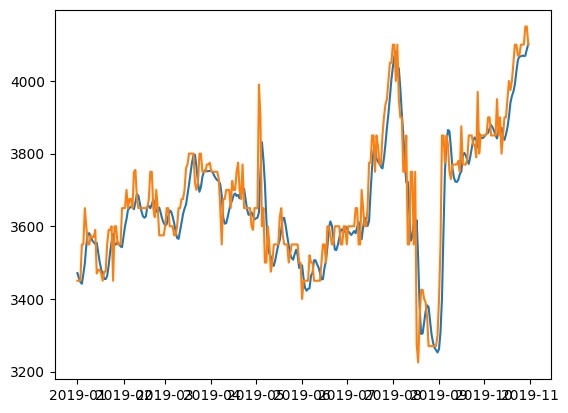

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

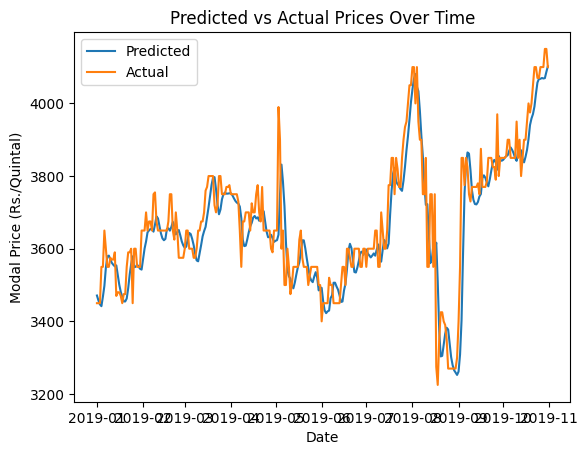

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

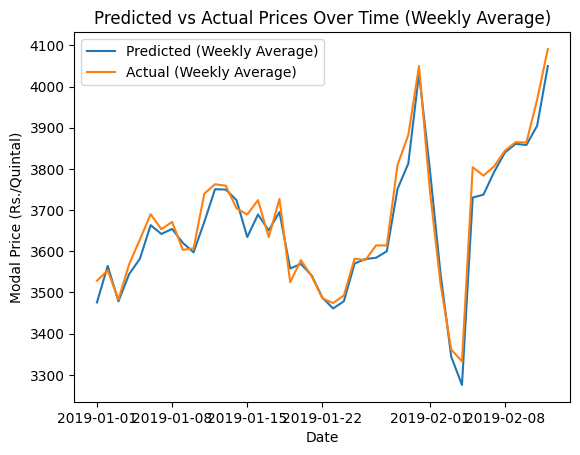

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

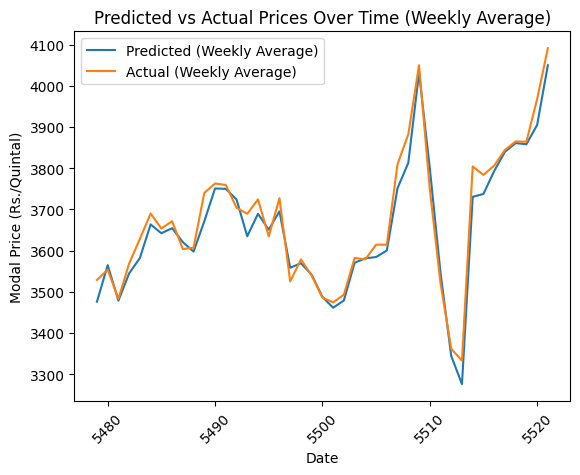

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()